<a href="https://colab.research.google.com/github/Gabriellemga/Python_Data_Science_Alura/blob/main/Geopandas/Desafio_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Uma empresa de turismo quer mapear as opções de atividades culturais em São Paulo, de acordo com a proximidade do metrô. Sua tarefa como cientista de dados vai ser mapear os locais culturais mais próximos das estações de metrô, especificamente da linha vermelha.

# Desafio 01: carregando dados

In [75]:
import geopandas as gpd

In [76]:
url = 'https://github.com/Gabriellemga/Python_Data_Science_Alura/raw/main/Geopandas/dados/Estado_SP.shp'
sp = gpd.read_file(url)
sp.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.2611, -49.61249 -21.26..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


<Axes: >

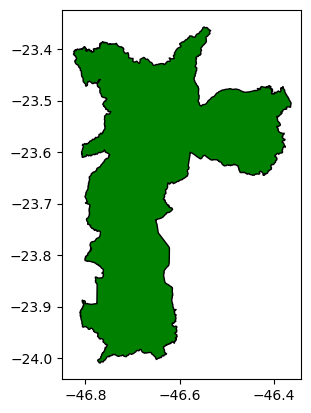

In [77]:
sp_sp = sp[sp['NM_MUN'] == 'São Paulo']
sp_sp.plot(color = 'green', edgecolor = 'black')

In [78]:
sp_sp.to_file('SP-MUNIC.shp')

# Desafio 02: alterando o CRS

In [79]:
url_metro = 'https://github.com/Gabriellemga/Python_Data_Science_Alura/raw/main/Geopandas/dados/SIRGAS_SHP_estacaometro_point.shp'

In [80]:
url_cult = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/SIRGAS_SHP_TEMA_-_CULTURA_TEATRO-CINEMA-SHOW.shp'

In [81]:
metro = gpd.read_file(url_metro)
metro.head()

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349839.38 7395675.047)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348457.592 7395884.165)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346732.712 7396874.617)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345181.965 7397070.921)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343708.935 7396765.736)


In [82]:
cult = gpd.read_file(url_cult)
cult.head()

,eq_esfera,eq_tipo,eq_nome,eq_enderec,eq_telefon,eq_bairro,eq_cep,eq_cd_esfe,eq_cd_tipo,eq_id,...,eq_cd_subp,eq_subpref,eq_regiao5,eq_regiao8,eq_espaco,eq_inaugur,eq_assento,eq_acessib,eq_estacio,geometry
0,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,617,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 1,20160427,158,None,None,POINT (323985.87 7406117.77)
1,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,618,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 2,20160427,199,None,None,POINT (323985.87 7406117.77)
2,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,619,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 3,20160427,161,None,None,POINT (323985.87 7406117.77)
3,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,620,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 4,20160427,131,None,None,POINT (323985.87 7406117.77)
4,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,621,...,02,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 5,20160427,122,None,None,POINT (323985.87 7406117.77)


In [83]:
sp_sp = sp_sp.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
sp_sp.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [84]:
metro = metro.set_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [85]:
cult = cult.set_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
cult.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

# Desafio 03: visualizando os dados

<Axes: >

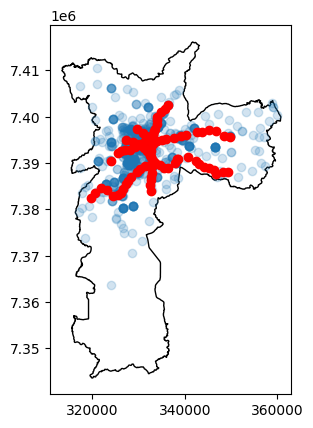

In [86]:
base = sp_sp.plot(color = 'white', edgecolor = 'black')
cult.plot(ax = base, alpha = 0.2)
metro.plot(ax = base, color = 'red')


## Desafio 04: calculando a distância

In [87]:
cult['Dist_Transporte'] = cult['geometry'].apply(lambda x: metro.distance(x).min())
cult.head()

,eq_esfera,eq_tipo,eq_nome,eq_enderec,eq_telefon,eq_bairro,eq_cep,eq_cd_esfe,eq_cd_tipo,eq_id,...,eq_subpref,eq_regiao5,eq_regiao8,eq_espaco,eq_inaugur,eq_assento,eq_acessib,eq_estacio,geometry,Dist_Transporte
0,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,617,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 1,20160427,158,None,None,POINT (323985.87 7406117.77),10577.306987
1,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,618,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 2,20160427,199,None,None,POINT (323985.87 7406117.77),10577.306987
2,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,619,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 3,20160427,161,None,None,POINT (323985.87 7406117.77),10577.306987
3,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,620,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 4,20160427,131,None,None,POINT (323985.87 7406117.77),10577.306987
4,PARTICULAR,SALAS DE CINEMA,CANTAREIRA NORTESHOPPING - CINEFLIX,"AV. RAIMUNDO PEREIRA DE MAGALHÃES, 11.001",None,JARDIM PIRITUBA,None,4,7,621,...,PIRITUBA-JARAGUA,NORTE,NORTE 2,SALA 5,20160427,122,None,None,POINT (323985.87 7406117.77),10577.306987


In [93]:
cult_top_10 = cult.sort_values("Dist_Transporte").reset_index()

cult_top_10 = cult_top_10[['eq_tipo', 'eq_enderec','Dist_Transporte']].head(10)

cult_top_10 = cult_top_10.rename(columns= {'eq_tipo': 'Tipo', 'eq_enderec': 'Endereço', 'Dist_Transporte':'Distância'})
cult_top_10

,Tipo,Endereço,Distância
0,SALAS DE TEATRO E SHOWS E CONCERTOS,"AV PAULISTA, 1.313",44.275380
1,SALAS DE TEATRO,"AV PAULISTA, 1.313",44.275380
2,SALAS DE SHOWS E CONCERTOS,"R SÃO BENTO, S/N",45.451931
3,SALAS DE TEATRO,"R DOMINGOS DE MORAES, 1497",47.241904
4,SALAS DE CINEMA,"R DOMINGOS DE MORAIS, 2.564",58.643697
5,SALAS DE CINEMA,"R DOMINGOS DE MORAIS, 2.564",58.643697
6,SALAS DE CINEMA,"R DOMINGOS DE MORAIS, 2.564",58.643697
7,SALAS DE CINEMA,"R DOMINGOS DE MORAIS, 2.564",58.643697
8,SALAS DE CINEMA,"R DOMINGOS DE MORAIS, 2.564",58.643697
9,SALAS DE CINEMA,"R DOMINGOS DE MORAIS, 2.564",58.643697


## Desafio: Polygon, Point, LineString e MultiPolygon

<Axes: >

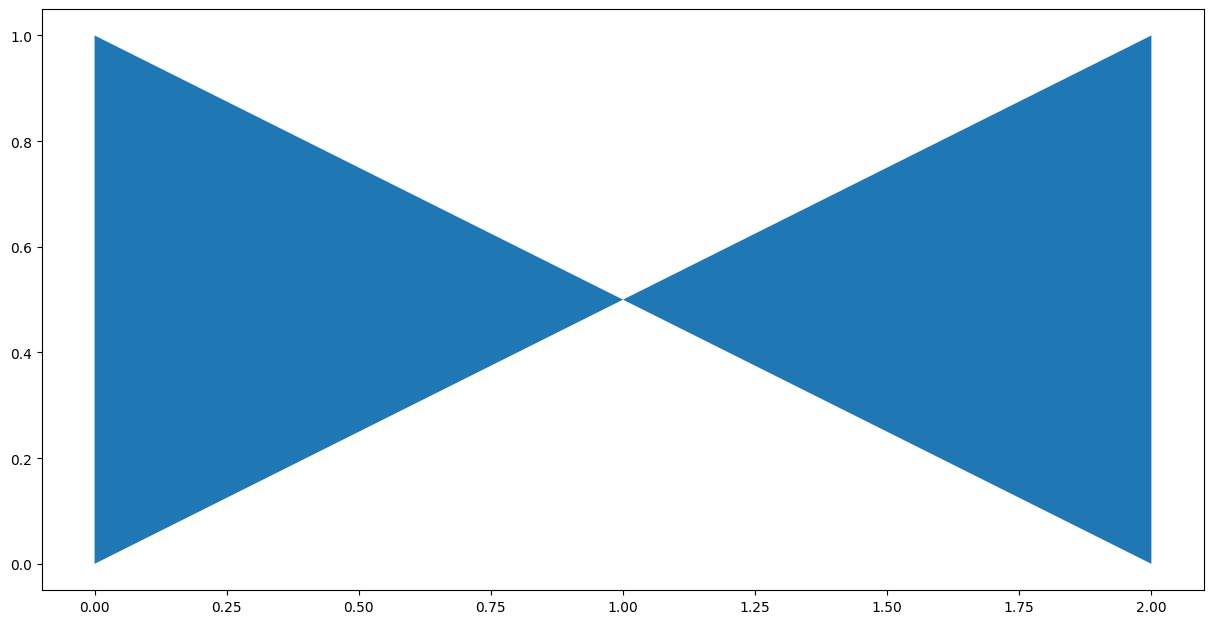

In [96]:
from shapely.geometry import MultiPolygon, Polygon, Point, LineString

p1 = Polygon([(0,0),(1,0.5),(0,1)])

p2 = Polygon([(2,0),(1,0.5),(2,1)])

p3 = MultiPolygon([p1,p2])
g = gpd.GeoSeries([p3])
g.plot(cmap = 'tab10', figsize = (15,10))

<Axes: >

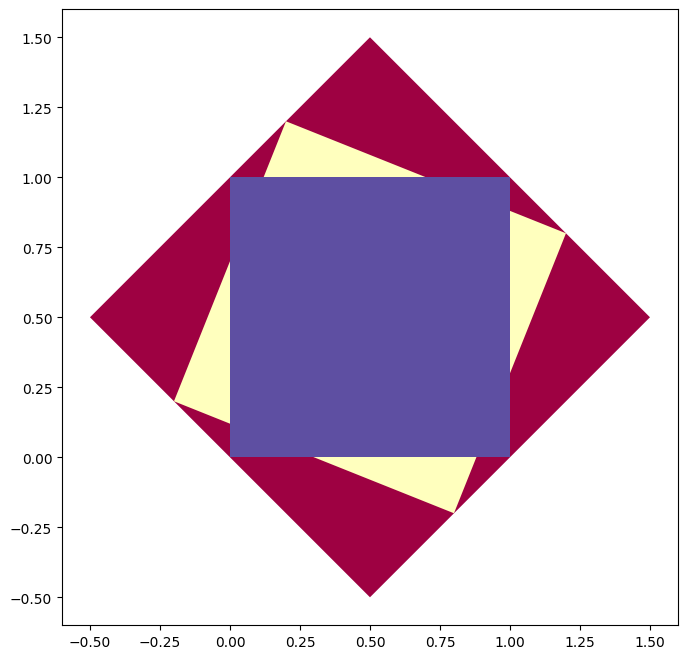

In [107]:
figuras = []
for i in [0.5, 0.2, 0]:
    figuras.append(Polygon([(0 - i, 0 + i),
                            (1 - i, 0 - i),
                            (1 + i, 1 - i),
                            (0 + i, 1 + i)]))

g = gpd.GeoSeries(figuras)
g.plot(cmap='Spectral', figsize=(15,8))

<Axes: >

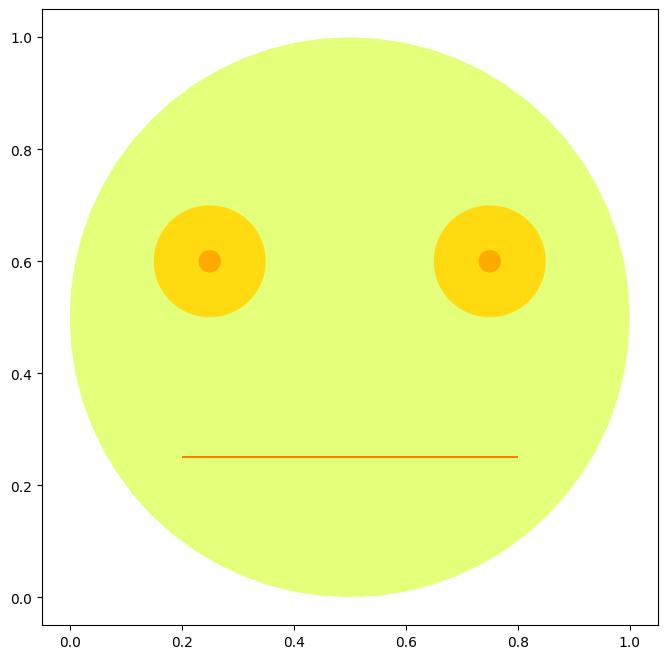

In [112]:
p1 = Point(0.5, 0.5).buffer(0.5)
p2 = MultiPolygon([Point(0.25, 0.6).buffer(0.1),
                    Point(0.75, 0.6).buffer(0.1)])
p3 = MultiPolygon([Point(0.25, 0.6).buffer(0.02),
                    Point(0.75, 0.6).buffer(0.02)])
p4 = LineString([(0.2, 0.25), (0.8, 0.25)])

g = gpd.GeoSeries([p1, p2, p3, p4])
g.plot(cmap='Wistia', figsize=(15,8))